In [3]:
import numpy as np
import pandas as pd
import cv2


In [4]:
dir_path = ''

# **Load Dataset**

In [5]:
X_train = pd.read_csv(dir_path + "X_train.csv",header=None)
Y_train = pd.read_csv(dir_path + "Y_train.csv",header=None)
X_test = pd.read_csv(dir_path + "X_test.csv",header=None)
Y_test = pd.read_csv(dir_path + "Y_test.csv",header=None)
key = pd.read_csv(dir_path + "Key_feature.csv",header=None)

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(key.shape)

(250202, 115)
(250202, 1)
(13040, 115)
(13040, 1)
(10000, 115)


# **Training Model**

In [7]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [8]:
# instantiate
# Tăng số cây và độ sâu để cải thiện hiệu suất
forest = RandomForestClassifier(
    n_estimators=200,  # Tăng số cây
    max_depth=20,      # Tăng độ sâu
    random_state=42, # Đặt ngẫu nhiên để tái lập kết quả, 
    n_jobs=-1          # Sử dụng toàn bộ CPU
)

'''
Giải thích: Đoạn code này sử dụng mô hình Random Forest để phân loại dữ liệu.
Mô hình này được cấu hình với 100 cây quyết định và độ sâu tối đa là 10, giúp cải thiện hiệu suất phân loại.
- n_estimators: số cây → càng nhiều, càng chính xác (nhưng chậm hơn)
- max_depth: độ sâu cây → càng sâu, càng phức tạp
- random_state: để mô hình tái lập được
- n_jobs: tăng tốc huấn luyện bằng toàn bộ CPU


'''

'\nGiải thích: Đoạn code này sử dụng mô hình Random Forest để phân loại dữ liệu.\nMô hình này được cấu hình với 100 cây quyết định và độ sâu tối đa là 10, giúp cải thiện hiệu suất phân loại.\n- n_estimators: số cây → càng nhiều, càng chính xác (nhưng chậm hơn)\n- max_depth: độ sâu cây → càng sâu, càng phức tạp\n- random_state: để mô hình tái lập được\n- n_jobs: tăng tốc huấn luyện bằng toàn bộ CPU\n\n\n'

In [9]:
# Reshape Y_train để tránh warning
Y_train_flat = Y_train.values.ravel()
forest.fit(X_train, Y_train_flat)

RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1,
                       random_state=42)

# **Evaluating Model**

In [10]:
# Đánh giá mô hình vừa huấn luyện được với TEST 1, yêu cầu các giá trị của 4 thang đo Accuracy, Precision, Precall, F1-score phải lớn hơn 95%
Y_pred = forest.predict(X_test)


# Tính các thang đo
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Kiểm tra yêu cầu > 95%
if all(score > 0.95 for score in [accuracy, precision, recall, f1]):
    print("Mô hình đạt yêu cầu!")
else:
    print("Cần cải thiện mô hình")



Accuracy: 0.9729
Precision: 1.0000
Recall: 0.9605
F1-score: 0.9798
Mô hình đạt yêu cầu!


# **Hint Flag**

In [11]:
f = np.zeros((200, 50))

In [12]:
f

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
print(len(Y_test))


13040


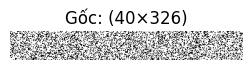

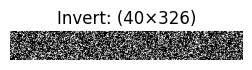

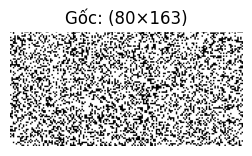

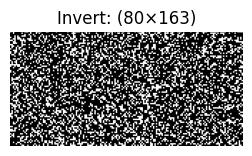

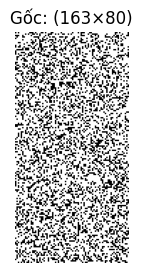

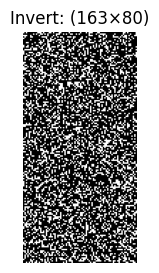

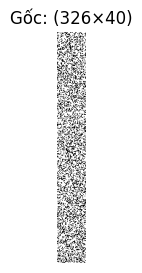

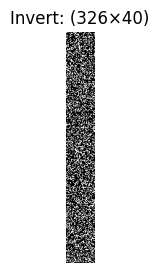

In [16]:
import numpy as np
import matplotlib.pyplot as plt

a_flat = np.array(Y_test).astype(np.uint8)
# Y_test chỉ chứa 0 hoặc 1, mình chuyển 1→255 để thành ảnh nhị phân
a_flat[a_flat == 1] = 255

# Tính tất cả cặp (r, c) sao cho r*c = 13040
factors = []
n = len(a_flat)
for r in range(1, int(np.sqrt(n)) + 1):
    if n % r == 0:
        factors.append((r, n // r))
        factors.append((n // r, r))
factors = sorted(set(factors))

for (r, c) in factors:
    if r < 30 or c < 30:
        # Bỏ qua các ma trận quá “mỏng”
        continue

    # reshape về kích thước (r, c)
    img = a_flat.reshape(r, c)

    # Hiển thị ảnh gốc
    plt.figure(figsize=(3, 3))
    plt.title(f"Gốc: ({r}×{c})")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

    # Tạo ảnh đã invert màu
    img_inv = 255 - img

    # Hiển thị ảnh đã invert
    plt.figure(figsize=(3, 3))
    plt.title(f"Invert: ({r}×{c})")
    plt.imshow(img_inv, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()


Tất cả các cặp (r, c) sao cho r*c = 10000:
  (   1 × 13040)
  (   2 × 6520)
  (   4 × 3260)
  (   5 × 2608)
  (   8 × 1630)
  (  10 × 1304)
  (  16 × 815 )
  (  20 × 652 )
  (  40 × 326 )
  (  80 × 163 )
  ( 163 × 80  )
  ( 326 × 40  )
  ( 652 × 20  )
  ( 815 × 16  )
  (1304 × 10  )
  (1630 × 8   )
  (2608 × 5   )
  (3260 × 4   )
  (6520 × 2   )
  (13040 × 1   )

Những cặp (r, c) ≥ 30×30:
  (   1 × 13040)
  (   2 × 6520)
  (   4 × 3260)
  (   5 × 2608)
  (   8 × 1630)
  (  10 × 1304)
  (  16 × 815 )
  (  20 × 652 )
  (  40 × 326 )
  (  80 × 163 )
  ( 163 × 80  )
  ( 326 × 40  )
  ( 652 × 20  )
  ( 815 × 16  )
  (1304 × 10  )
  (1630 × 8   )
  (2608 × 5   )
  (3260 × 4   )
  (6520 × 2   )
  (13040 × 1   )


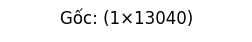

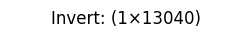

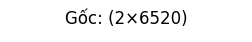

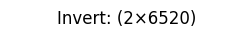

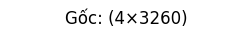

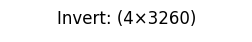

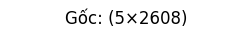

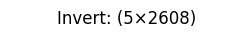

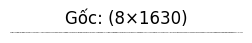

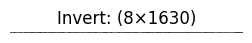

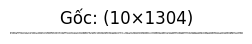

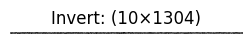

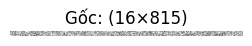

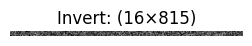

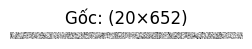

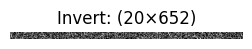

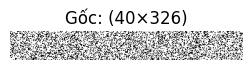

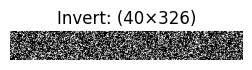

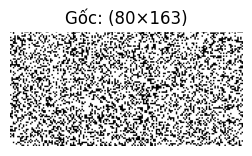

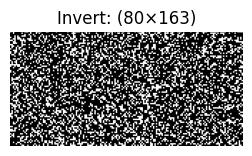

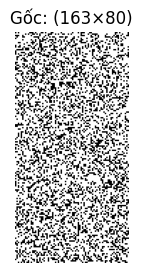

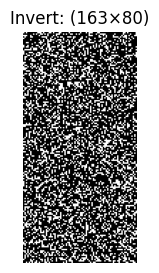

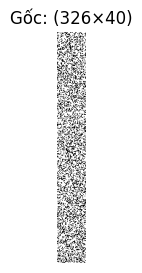

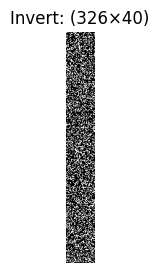

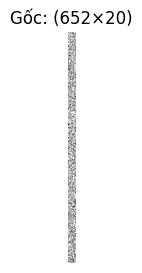

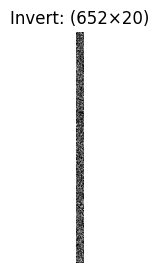

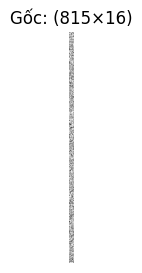

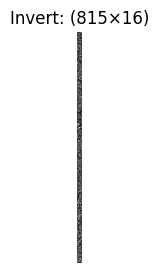

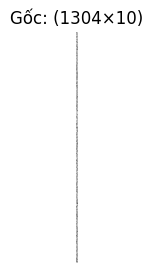

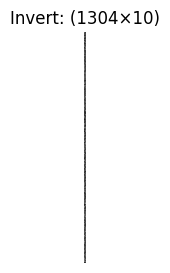

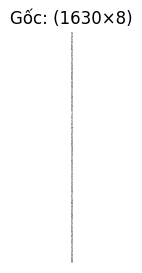

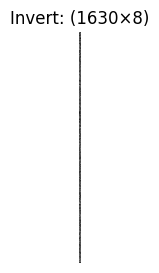

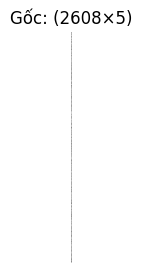

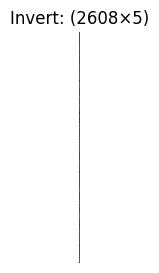

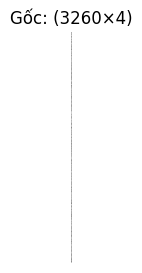

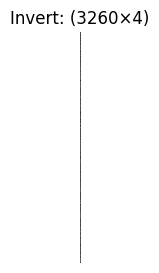

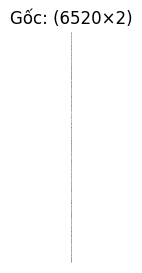

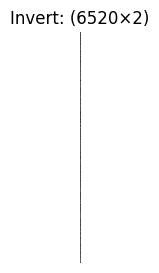

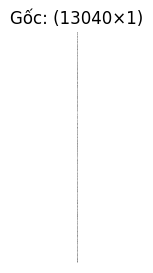

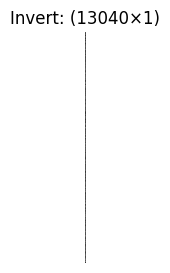

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử Y_test chứa ≥ 10000 phần tử 0/1:
a_flat = np.array(Y_test).astype(np.uint8)
a_flat[a_flat == 1] = 255   # đổi 1 → 255 để thành ảnh nhị phân

# Nếu mảng dài hơn 10000, chỉ lấy 10000 phần tử đầu:
n_target = 13040
if len(a_flat) < n_target:
    # Nếu thiếu, pad thêm 0 để đủ 10000
    pad_len = n_target - len(a_flat)
    a_flat = np.pad(a_flat, (0, pad_len), constant_values=0)
else:
    # Nếu dư, cắt bớt cho vừa
    a_flat = a_flat[:n_target]

# 1. Tìm các cặp (r, c) sao cho r*c = 10000
factors_10000 = []
for r in range(1, int(np.sqrt(n_target)) + 1):
    if n_target % r == 0:
        factors_10000.append((r, n_target // r))
        factors_10000.append((n_target // r, r))
factors_10000 = sorted(set(factors_10000))

print("Tất cả các cặp (r, c) sao cho r*c = 10000:")
for (r, c) in factors_10000:
    print(f"  ({r:>4} × {c:<4})")
    
# 2. Lọc ra những cặp “đủ to” để hiển thị dễ nhìn (ví dụ cả r và c ≥ 30)
valid_pairs = [(r, c) for (r, c) in factors_10000 if r >= 1 and c >= 1]
print("\nNhững cặp (r, c) ≥ 30×30:")
for (r, c) in valid_pairs:
    print(f"  ({r:>4} × {c:<4})")

# 3. Hiển thị thử cho mỗi (r,c) trên, cả ảnh gốc và invert
for (r, c) in valid_pairs:
    img = a_flat.reshape(r, c)

    # Hiển thị ảnh gốc
    plt.figure(figsize=(3, 3))
    plt.title(f"Gốc: ({r}×{c})")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

    # Hiển thị ảnh đã invert (nếu muốn)
    img_inv = 255 - img
    plt.figure(figsize=(3, 3))
    plt.title(f"Invert: ({r}×{c})")
    plt.imshow(img_inv, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
